<a href="https://colab.research.google.com/github/Thib433/MPA-MLF-Thibaud-Doireau-2025/blob/main/MPA_MLF_PCA_2_ThibaudDoireau_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [4]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R=np.matmul(X,X.T)/3
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
print(U)
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(u1)
print(u2)



#Calculate the coordinates in new orthonormal basis:
X_new_basis = np.dot(U.T, X)
print("Coordinates in new orthonormal basis:")
print(X_new_basis)

# Calculate the approximation of the original from new basis
X_reconstructed = np.dot(U,X_new_basis)
print("Reconstructed X:")
print(X_reconstructed)

# Check that you got the original
if np.allclose(X, X_reconstructed):
    print("OK :The original matrix is reconstructed correctly")
else:
    print("KO :Reconstruction is not accurate")



[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[-0.40455358 -0.9145143 ]
[-0.9145143   0.40455358]
Coordinates in new orthonormal basis:
[[-4.46716435 -3.14809647  0.        ]
 [-0.21081425  0.29914646  0.        ]]
Reconstructed X:
[[2. 1. 0.]
 [4. 3. 0.]]
OK :The original matrix is reconstructed correctly


# PCA on Iris data

In [5]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


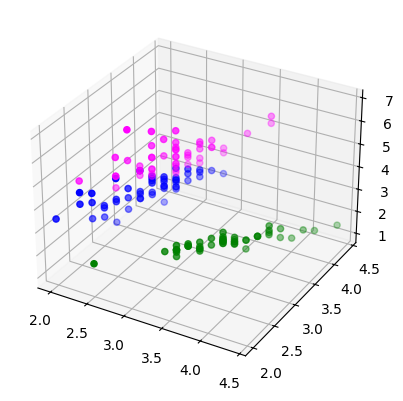

In [6]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show()


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


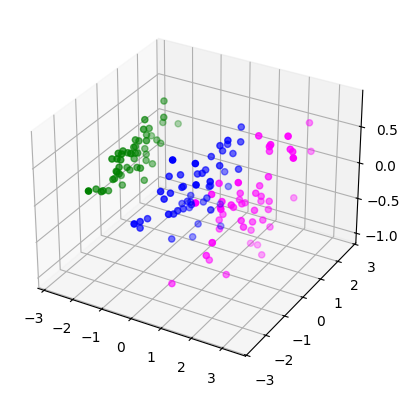

In [7]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show()


In [8]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [9]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

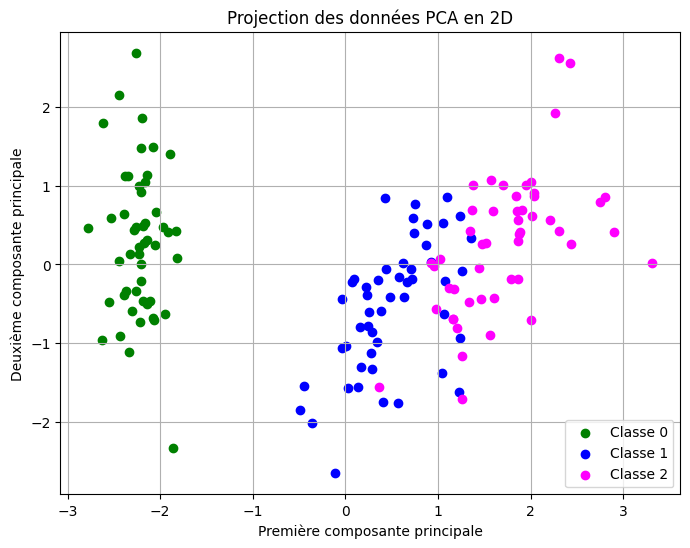

In [11]:
# Plot the principal components in 2D, mark different targets in color
plt.figure(figsize=(8, 6))
plt.scatter(Xpca[y == 0, 0], Xpca[y == 0, 1], color='green', label='Classe 0')
plt.scatter(Xpca[y == 1, 0], Xpca[y == 1, 1], color='blue', label='Classe 1')
plt.scatter(Xpca[y == 2, 0], Xpca[y == 2, 1], color='magenta', label='Classe 2')
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.title("Projection des données PCA en 2D")
plt.legend()
plt.grid(True)
plt.show()


# KNN classifier

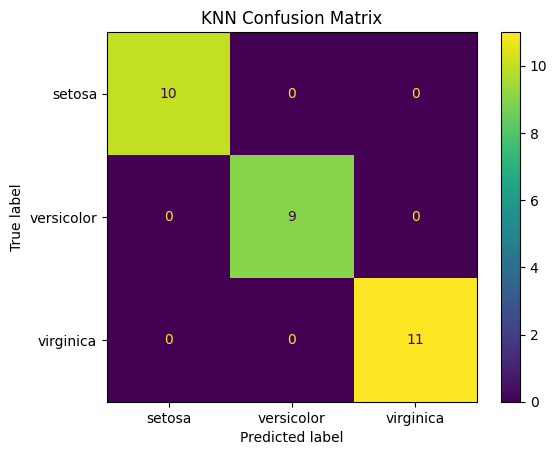

In [23]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Division of data into training set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialisation and training of the KNN classifier (k=3)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

# Prediction on the test set
y_pred = knn1.predict(X_test)

# Calculating and displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

# Displaying the confusion matrix graphically
disp.plot()
plt.title("KNN Confusion Matrix")
plt.show()




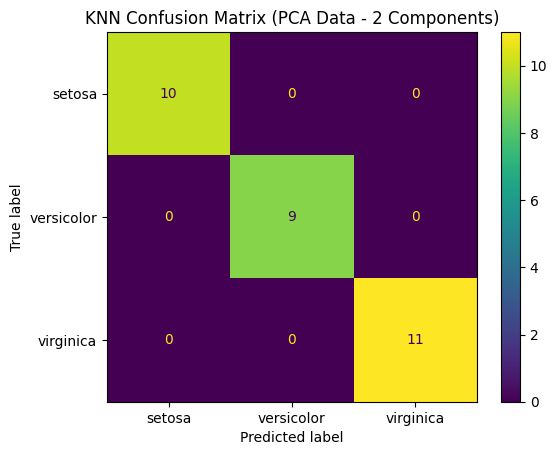

In [24]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset

from sklearn.decomposition import PCA

# Apply PCA to reduce the data to the first 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#Division of PCA data into training set (80%) and test set (20%)
X_train_pca, X_test_pca, y_train,y_test = train_test_split(X_pca, y,test_size=0.2, random_state=42)
# Initialization and training of the KNN classifier on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Prediction on the test set
y_pred_pca = knn_pca.predict(X_test_pca)

# Computation and display of the confusion matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=iris.target_names)

# Displaying the confusion matrix for PCA-transformed data
disp_pca.plot()
plt.title("KNN Confusion Matrix (PCA Data - 2 Components)")
plt.show()



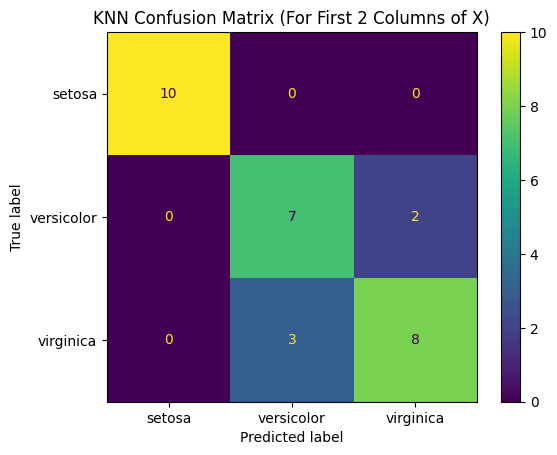

In [26]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#Using only the first two columns of X
X_2D = X[:, :2]  # Selecting only the first two features

# Splitting the data into training (80%) and test (20%) sets
X_train_2D, X_test_2D, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, random_state=42)

#Initialization and training of the KNN classifier
knn_2D = KNeighborsClassifier(n_neighbors=3)
knn_2D.fit(X_train_2D, y_train)

# Prediction on the test set
y_pred_2D = knn_2D.predict(X_test_2D)

# Computation and display of the confusion matrix
cm_2D = confusion_matrix(y_test, y_pred_2D)
disp_2D = ConfusionMatrixDisplay(confusion_matrix=cm_2D,display_labels=iris.target_names)

# Displaying the confusion matrix for the original 2D data
disp_2D.plot()
plt.title("KNN Confusion Matrix (For First 2 Columns of X)")
plt.show()


#Comparison of the accuracies of the three models
accuracy_original = accuracy_score(y_test,y_pred)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_2D = accuracy_score(y_test, y_pred_2D)

